In [39]:
# Visualisation2
# Relation between review length and number of word hits
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/moodywords_result.csv')


textCol = df["words"]
bookIdCol = df["id"]
df = df.drop(df.columns[[0, 8, 9]], axis=1) 
df["sumhits"] = df[list(df)].sum(axis=1)
df["words"] = textCol
df["id"] = bookIdCol
df = df.drop(df.columns[[0,1,2,3,4,5,6]], axis=1) 

reviews = pd.read_json('data/reviews.json')
reviews = reviews.drop(reviews.columns[[3,4]], axis=1)
reviews


,number,author,title
0,100,by Nora Ephron (2006),I Feel Bad About My Neck
1,99,"by Alain Mabanckou (2005), translated by Helen...",Broken Glass
2,98,"by Stieg Larsson (2005), translated by Steven ...",The Girl
3,97,by JK Rowling (2000),Harry Potter and the Goblet of Fire
4,96,by Hanya Yanagihara (2015),A Little Life
...,...,...,...
79,6,by Philip Pullman (2000),The Amber Spyglass
80,5,"by WG Sebald (2001), translated by Anthea Bell...",Austerlitz
81,4,by Kazuo Ishiguro (2005),Never Let Me Go
82,2,by Marilynne Robinson (2004),Gilead


In [55]:
reviews["sumhits"] = df["sumhits"]
reviews["words"] = df["words"]
reviews

,number,author,title,sumhits,words
0,100,by Nora Ephron (2006),I Feel Bad About My Neck,2.0,655.0
1,99,"by Alain Mabanckou (2005), translated by Helen...",Broken Glass,5.0,657.0
2,98,"by Stieg Larsson (2005), translated by Steven ...",The Girl,6.0,1654.0
3,97,by JK Rowling (2000),Harry Potter and the Goblet of Fire,3.0,1570.0
4,96,by Hanya Yanagihara (2015),A Little Life,1.0,320.0
...,...,...,...,...,...
79,6,by Philip Pullman (2000),The Amber Spyglass,NaN,NaN
80,5,"by WG Sebald (2001), translated by Anthea Bell...",Austerlitz,NaN,NaN
81,4,by Kazuo Ishiguro (2005),Never Let Me Go,NaN,NaN
82,2,by Marilynne Robinson (2004),Gilead,NaN,NaN


In [73]:
top = reviews[(reviews['sumhits'] > 5)]
sortedTop = top.sort_values('sumhits', ascending=False)
sortedTop

,number,author,title,sumhits,words
37,61,by Helen Garner (2014),This House of Grief,11.0,1434.0
18,81,by Jim Crace (2013),Harvest,10.0,1991.0
54,41,by Ian McEwan (2001),Atonement,9.0,1629.0
55,38,by Alan Hollinghurst (2004),The Line of Beauty,9.0,1626.0
56,37,by Anne Enright (2015),The Green Road,9.0,1404.0
9,91,by M John Harrison (2002),Light,7.0,1837.0
49,46,by Seamus Heaney (2010),Human Chain,7.0,1513.0
50,45,by Julian Barnes (2013),Levels of Life,7.0,2243.0
2,98,"by Stieg Larsson (2005), translated by Steven ...",The Girl,6.0,1654.0
7,93,by Nicola Barker (2007),Darkmans,6.0,1524.0


<AxesSubplot:xlabel='sumhits', ylabel='title'>

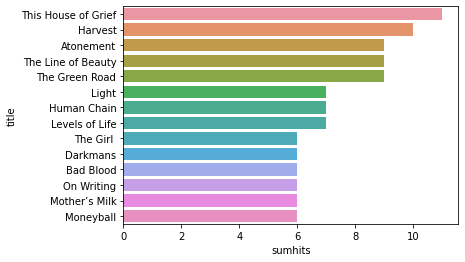

In [74]:
sns.barplot(x="sumhits", y="title",data=sortedTop)